# How to load data

This notebook explains how to load and use the different files.

## Load agents and evaluations

Agents, that include graphs, and associated evaluations results are stored in the JSONL file `data.jsonl` which can be loaded as follows:

In [2]:
import json
from typing import Literal

filepath = 'data.jsonl'

with open(filepath, 'r') as f:
    data = []
    for line in f:
        data.append(json.loads(line))

print(len(data))

3442


There are 3442 lines in the file, corresponding to 3442 distinct graphs.
Each line is a list, with the first element being a so-called Agent dictionary and the second element the evaluation results, which is also a dictionary, obtained for the Agent on a set of math problems.

In [4]:
agent = data[-1][0]
print(f"Agent dictionary : {agent}")
evaluations = data[0][1]
print(f"Evaluations dictionary : {evaluations}")

Agent dictionary : {'id': 'a-7e8e500c-43f0-444e-a7e9-00b4f8856721', 'graph': {'description': "This graph is expertly designed to tackle mathematical problems, starting the process at the 'start' node, leveraging a sophisticated 'mathSolverLLM' for in-depth analysis, and concluding decisively at the 'end' node based on the outcomes.", 'shared_context_prompt': "In this optimized AI model crafted to solve mathematical problems, the cornerstone LLM named 'mathSolverLLM' critically engages with the mathematical challenge post-initiation from the 'start' node. Your mission is to dissect, analyze, and resolve or refine the problem based on your deep analytical skills. Depending on your findings, guide the model to either a direct solution or through necessary refinements for an optimal result. Use the problem: '{problem}'.", 'edges': [{'start_node_id': 'start', 'end_node_id': 'mathSolverLLM'}, {'start_node_id': 'mathSolverLLM', 'end_node_id': 'end', 'condition': '[solution found]'}, {'start_n

## Agent dictionary

The agent dictionary has two keys : 
- "id": a unique identifier ;
- "graph": the graph of the agent which is a dictionary.

### Graph dictionary

The graph dictionary has, at most, four keys :
- "description": a string, generated by the architect AI, that describes the general purpose of the graph; here, all graphs are generated for "solving math problems";
- "shared_context_prompt", optional: if present, this prompt is shared by all LLMNodes in the graph; it is supposed to give a general context to each LLMNode to better understand his role in the whole graph; due to the course of experiments overtime, some graphs do not implement this key and in that case, the value of "shared_context_prompt" should be default to an empty string;
- "edges": a list of the edges that compose the graph;
- "nodes" : a list of nodes; each node has at least an `"id"` and a `"type"` keys.

In [11]:
agent["graph"]

{'description': "This graph is expertly designed to tackle mathematical problems, starting the process at the 'start' node, leveraging a sophisticated 'mathSolverLLM' for in-depth analysis, and concluding decisively at the 'end' node based on the outcomes.",
 'shared_context_prompt': "In this optimized AI model crafted to solve mathematical problems, the cornerstone LLM named 'mathSolverLLM' critically engages with the mathematical challenge post-initiation from the 'start' node. Your mission is to dissect, analyze, and resolve or refine the problem based on your deep analytical skills. Depending on your findings, guide the model to either a direct solution or through necessary refinements for an optimal result. Use the problem: '{problem}'.",
 'edges': [{'start_node_id': 'start', 'end_node_id': 'mathSolverLLM'},
  {'start_node_id': 'mathSolverLLM',
   'end_node_id': 'end',
   'condition': '[solution found]'},
  {'start_node_id': 'mathSolverLLM',
   'end_node_id': 'mathSolverLLM',
   '

### Node dictionary

The key "nodes" in the graph dictionary is a list of dictionaries. Each dictionary is a node. Each node has, at least, two keys:
- `"id"`: the identifier of the node;
- `"type"`: the type of the node.

There are, for now, three types of node:
- `node["type"]=="start"`: this node embodies the entry point of the graph and has no other purpose than that;
- `node["type]=="end"`: this node embodies the ouput of the graph and has no other other purpose than tha;
- `node["type"]=="LLM"`: this node is associated with the execution of an LLM.

In [15]:
# a start node
print("A start node dictionary: {}".format(agent["graph"]["nodes"][0]))
# an end node
print("An end node dictionary: {}".format(agent["graph"]["nodes"][-1]))
# an LLM node
print("An LLM node dictionary: {}".format(agent["graph"]["nodes"][1]))
print(agent["graph"]["nodes"][1].keys())

A start node dictionary: {'id': 'start', 'type': 'start'}
An end node dictionary: {'id': 'end', 'type': 'end'}
An LLM node dictionary: {'id': 'mathSolverLLM', 'name': 'mathSolverLLM', 'purpose': 'To both deeply and methodically analyze and solve the provided mathematical issues, iterating as necessary to achieve a definitive solution.', 'type': 'LLM', 'prompt': "Meticulously analyze the mathematical problem at hand. Begin with a sequential logical breakdown, exploring possible solutions methodically. Depending on your findings, choose to: 1. Announce a complete solution with the addition '[solution found]' if the problem is fully resolved. 2. Signal the need for further investigation or clarification with '[refinement needed]', articulating any specific areas that require deeper analysis or additional information.", 'model': 'azure-gpt-3.5-turbo'}
dict_keys(['id', 'name', 'purpose', 'type', 'prompt', 'model'])


### LLMNode dictionary

An LLMNode dictionary has six keys:
- `"id"`: a unique identifier of the node;
- `"type"`: the type of the node, which is always `"LLM"`;
- `"name"`: the name of the node;
- `"purpose"`: a short description of the role of the node
- `"prompt"`: the generated prompt of the node, to be used in combination with the `shared_prompt_context` if present;
- `"model"`: the generative LLM model that is to be used when invoking the node. 

**In the context of these experiments, the key `"model"` might not be used considering its value is always either `"gpt3.5-turbo"` or `"azure-gpt-3.5-turbo"`. Furthermore, its value is not yet generated by the architect AI.**


### Edge dictionary

An edge has, at most, three keys:
- `"start_node_id"`: the id of the start node of the edge;
- `"end_node_id"`: the id of the end node of the edge;
- `"condition"`, optional: if present, the edge is a conditional edge, and the edge will be chosen by the start node if the so-called condition is met.

In [12]:
print("A edge without condition: {}".format(agent["graph"]["edges"][0]))
print("A conditional edge: {}".format(agent["graph"]["edges"][1]))

A edge without condition: {'start_node_id': 'start', 'end_node_id': 'mathSolverLLM'}
A conditional edge: {'start_node_id': 'mathSolverLLM', 'end_node_id': 'end', 'condition': '[solution found]'}


### Displaying a graph with Mermaid

A Mermaid string can be generated from the graph dictionary with the following function. The generated string can then copy-pasted to an online Mermaid visualizer such as 

In [28]:
def to_mermaid_str(graph: dict, orientation: Literal["TB", "TR", "TD", "RL", "LR"] = "TD") -> str:
    mermaid_str = f"graph {orientation}\n"

    nodes_dict = {node["id"]: node for node in graph["nodes"]}
    for edge in graph["edges"]:
        start_node = nodes_dict[edge["start_node_id"]]
        end_node = nodes_dict[edge["end_node_id"]]

        start_node_name = start_node.get("name") if "name" in start_node else start_node.get("id")
        end_node_name = end_node.get("name") if "name" in end_node else end_node.get("id")

        start_node_id = edge["start_node_id"].replace(" ", "").title()
        end_node_id = edge["end_node_id"].replace(" ", "").title()

        # Determine the appropriate brackets for the node type
        start_node_block = f"({start_node_name})"
        end_node_block = f"({end_node_name})"

        if "condition" in edge and edge["condition"] != "":
            mermaid_str += f"\t{start_node_id}{start_node_block} --{edge["condition"]}--> {end_node_id}{end_node_block}\n"
        else:
            mermaid_str += f"\t{start_node_id}{start_node_block} --> {end_node_id}{end_node_block}\n"

    return mermaid_str

mermaid_str = to_mermaid_str(agent["graph"])
print(mermaid_str)

graph TD
	Start(start) --> Mathsolverllm(mathSolverLLM)
	Mathsolverllm(mathSolverLLM) --[solution found]--> End(end)
	Mathsolverllm(mathSolverLLM) --[refinement needed]--> Mathsolverllm(mathSolverLLM)



Or you can use the following function to plot it here.

In [29]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt
from IPython.display import Markdown

def mm(mermaid_str):
    graphbytes = mermaid_str.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    print("https://mermaid.ink/img/" + base64_string)
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm(mermaid_str)

https://mermaid.ink/img/Z3JhcGggVEQKCVN0YXJ0KHN0YXJ0KSAtLT4gTWF0aHNvbHZlcmxsbShtYXRoU29sdmVyTExNKQoJTWF0aHNvbHZlcmxsbShtYXRoU29sdmVyTExNKSAtLVtzb2x1dGlvbiBmb3VuZF0tLT4gRW5kKGVuZCkKCU1hdGhzb2x2ZXJsbG0obWF0aFNvbHZlckxMTSkgLS1bcmVmaW5lbWVudCBuZWVkZWRdLS0+IE1hdGhzb2x2ZXJsbG0obWF0aFNvbHZlckxMTSkK


## Evaluation dictionary

An evaluation dictionary is made of three keys:
- `"evaluations"`: a list of boolean values; the length of the list depends on the number of math problems the associated agent has been evaluated on; if the boolean is True, the graph has succeeded in solving the math problem; otherwise, the boolean value is set to False;
- `"accuracy"`: the average accuracy of the graph on the set of problems, computed as `sum(evaluations["evaluations"])/len(evaluations["evaluations"])`;
- `"dataset_indexes"`: the indexes of the math problems on which the graph has been evaluated; the indexes always refer to the validation set.

Graphs have been evaluated on various numbers of problems. In total, there are **103,859 couples (graph, math problem)**.

In [6]:
print(f"Evaluations dictionary : {evaluations}")
print(evaluations.keys())

Evaluations dictionary : {'evaluations': [True, True, False, True, False, True, False, False, False, True, False, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True], 'accuracy': 0.7333333333333333, 'dataset_indexes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]}
dict_keys(['evaluations', 'accuracy', 'dataset_indexes'])


## Loading the datasets

The datasets of math problems are stored in the `gsm8k-test.pkl` and `gsm8k-validation.pkl` files. Each dataset has two keys: 

In [5]:
import pickle as pkl
validation_set = pkl.load(open("gsm8k-validation.pkl", "rb"))
print("Validation set keys: ", validation_set.keys())
print("Number of validation samples: ", len(validation_set["question"]))
test_set = pkl.load(open("gsm8k-test.pkl", "rb"))
print("Test set keys: ", test_set.keys())
print("Number of test samples: ", len(test_set["question"]))


Validation set keys:  dict_keys(['question', 'target'])
Number of validation samples:  84
Test set keys:  dict_keys(['question', 'target'])
Number of test samples:  190


In [7]:
validation_set

{'question': ["Every day, Wendi feeds each of her chickens three cups of mixed chicken feed, containing seeds, mealworms and vegetables to help keep them healthy.  She gives the chickens their feed in three separate meals. In the morning, she gives her flock of chickens 15 cups of feed.  In the afternoon, she gives her chickens another 25 cups of feed.  How many cups of feed does she need to give her chickens in the final meal of the day if the size of Wendi's flock is 20 chickens?",
  'John drives for 3 hours at a speed of 60 mph and then turns around because he realizes he forgot something very important at home.  He tries to get home in 4 hours but spends the first 2 hours in standstill traffic.  He spends the next half-hour driving at a speed of 30mph, before being able to drive the remaining time of the 4 hours going at 80 mph.  How far is he from home at the end of those 4 hours?',
  'Carlos is planting a lemon tree. The tree will cost $90 to plant. Each year it will grow 7 lemon

In [2]:
! ls

__init__.py	  data_utils.py  graph_tokenizer_1.json   train_tokenizers.py
__pycache__	  data_viz.py	 load_data.ipynb
data_analysis.py  dataloader.py  prompt_tokenizer_1.json
data_config.yaml  dataset.py	 tokenizer.py


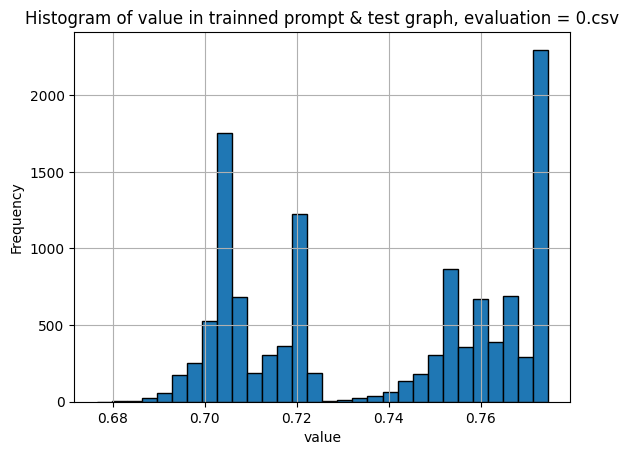

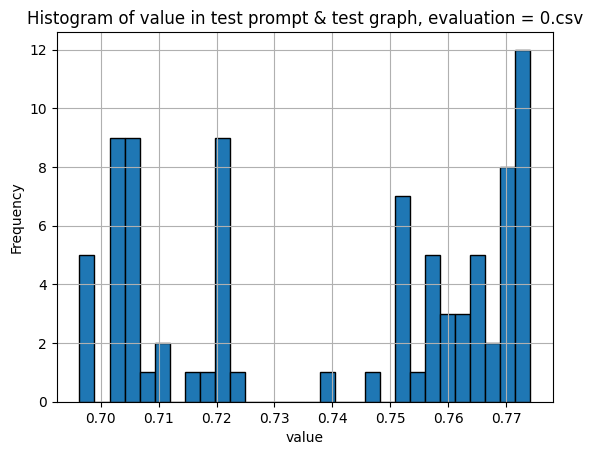

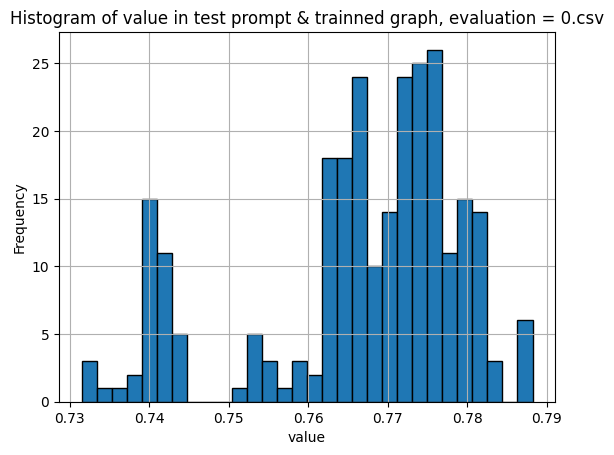

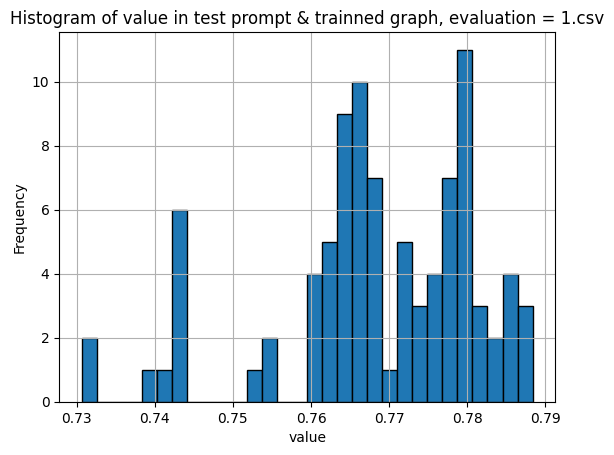

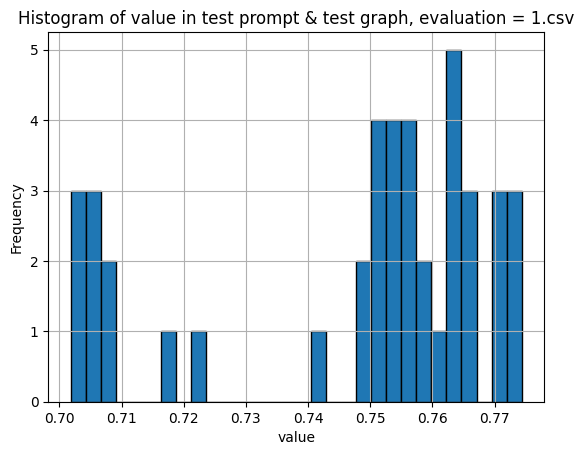

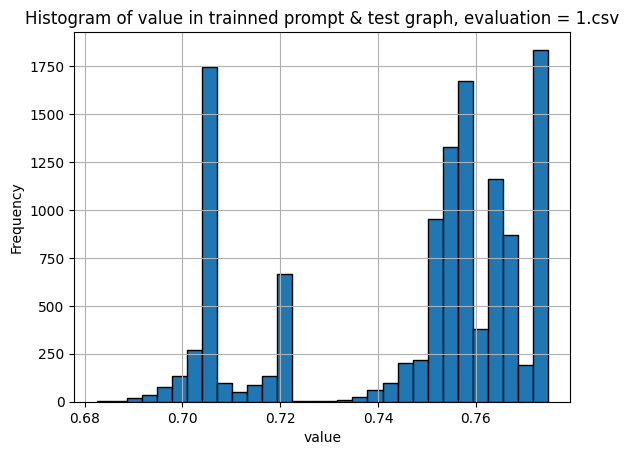

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to the folder containing the CSV files
folder_path = '/home/etin_l/code/EtiNL/Python/Ebiose_CLGP/ebiose_clgp/data/'

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Loop through each CSV file
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    
    # Load the CSV file
    data = pd.read_csv(file_path)
    
    # Display the first few rows of the dataframe
    # print(f'First few rows of {file}:')
    # print(data.head())
    
    # Plot histogram for each numeric column in the dataframe
    for column in data.select_dtypes(include=['number']).columns:
        plt.figure()
        plt.hist(data[column].dropna(), bins=30, edgecolor='black')
        plt.title(f'Histogram of {column} in {file}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()